In [ ]:
%matplotlib notebook

In [1]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

## Battery

In [2]:
class Battery:
    def __init__(self, max_capacity, energy_stored, house):
        self.max_capacity = max_capacity
        self.energy_stored = energy_stored
        self.df_house = pd.read_csv('df' + house + '_per1uur', index_col=0)
        
        
        
    def store_energy(self, date):
        self.date_info = self.df_house.loc[date]
        self.energy_stored += self.date_info.perdag_total_energy_out
        
    
    def release_energy(self, date):
        self.date_info = self.df_house.loc[date]
        self.energy_stored -= self.date_info.perdag_total_energy_in
        
    #Beetje omslachtig maar het werkt.    
    def battery_storage_year(self):
        data=[]
        data1=[]
        data2=[]
        
        start_date = datetime(2019, 1, 1, 0, 0, 0)
        end_date = datetime(2020, 1, 1, 0, 0, 0)
        delta = timedelta(minutes=60)
        
        while start_date <= end_date:
            
            self.date_info = self.df_house.loc[str(start_date)]
            
            if self.energy_stored + self.date_info.perdag_total_energy_out <= self.max_capacity:
                self.store_energy(str(start_date))
                row1 =[str(start_date), 0]
                data1.append(row1)
            else:
                row1 =[str(start_date), self.date_info.perdag_total_energy_out]
                data1.append(row1)
            
            if self.energy_stored - self.date_info.perdag_total_energy_in >= 0:
                self.release_energy(str(start_date))
                row2 =[str(start_date), 0]
                data2.append(row2)
            else:
                row2 =[str(start_date), self.date_info.perdag_total_energy_in]
                data2.append(row2)
            
            row = [str(start_date), self.energy_stored]
            data.append(row)
            
            start_date += delta
            
   
        
        df_storage_perday = pd.DataFrame(data, columns = ['Date','Energy_stored'])
        df_energy_out_new = pd.DataFrame(data1, columns = ['Date', 'Energy_out_new'])
        df_energy_in_new = pd.DataFrame(data2, columns = ['Date', 'Energy_in_new'])
        
        df_storage_perday.Date = pd.to_datetime(df_storage_perday.Date)
        df_energy_out_new.Date = pd.to_datetime(df_energy_out_new.Date)
        df_energy_in_new.Date = pd.to_datetime(df_energy_in_new.Date)
        
        return df_storage_perday, df_energy_out_new, df_energy_in_new
    
    def get_total_energy_stored(self):
        return 'The battery stored ' + str(int(sum(df[0].Energy_stored.dropna()))) + ' kwh this year.', int(sum(df[0].Energy_stored.dropna()))
    
    def get_total_energy_out(self):
        return 'The house gave ' + str(int(sum(df[1].Energy_out_new.dropna()))) + ' kwh to the net.', int(sum(df[1].Energy_out_new.dropna()))
    
    def get_total_energy_in(self):
        return 'The house needed to import ' + str(int(sum(df[2].Energy_in_new.dropna()))) + ' kwh from the net.', int(sum(df[2].Energy_in_new.dropna()))


In [3]:
b0 = Battery(3, 0, '02')

In [4]:
b1 = Battery(7, 0, '02')

In [5]:
b2 = Battery(11.4, 0, '02')

In [6]:
df = b2.battery_storage_year()


## Graph Battery for house 2

In [7]:
fig, ax = plt.subplots(3,1,figsize=(100, 80),sharey=True)
ax[0].set_title("Energy stored in battery", size=100)
ax[0].set_ylabel("Energy (kwh)", size=70)
ax[0].set_xlabel("Date", size=70)
ax[0].tick_params(labelsize = 50)
ax[1].set_title("Energy out after battery usage", size=100)
ax[1].set_ylabel("Energy (kwh)", size=70)
ax[1].set_xlabel("Date", size=70)
ax[1].tick_params(labelsize = 50)
ax[2].set_title("Energy in after battery usage", size=100)
ax[2].set_ylabel("Energy (kwh)", size=70)
ax[2].set_xlabel("Date", size=70)
ax[2].tick_params(labelsize = 50)
ax[0].plot(df[0].Date, df[0].Energy_stored, color='blue', label='Energy stored')
ax[1].plot(df[1].Date, df[1].Energy_out_new, color='red', label='Energy out')
ax[2].plot(df[2].Date, df[2].Energy_in_new, color='green', label='Energy in')
plt.show()

## Choosing optimal Battery

In [8]:
b2.get_total_energy_out()[0]

'The house gave 4240 kwh to the net.'

In [9]:
b2.get_total_energy_in()[0]

'The house needed to import 1654 kwh from the net.'

In [10]:
b2.get_total_energy_stored()[0]

'The battery stored 50530 kwh this year.'

<IPython.core.display.Javascript object>


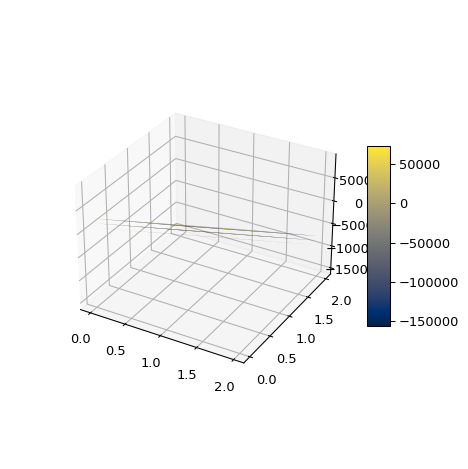

In [11]:
%matplotlib notebook

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

x = np.arange(0, 2, 0.01)
y = np.arange(0, 2, 0.01)

X, Y = np.meshgrid(x, y)
Z2 = 20*(X*b2.get_total_energy_in()[1] - Y*b2.get_total_energy_out()[1]) + 30000
Z1 = 20*(X*b1.get_total_energy_in()[1] - Y*b1.get_total_energy_out()[1]) + 20000
Z0 = 20*(X*b0.get_total_energy_in()[1] - Y*b0.get_total_energy_out()[1]) + 10000




surf0 = ax.plot_surface(X, Y, Z0, cmap = plt.cm.cividis)
surf1 = ax.plot_surface(X, Y, Z1, cmap = plt.cm.cividis)
surf2 = ax.plot_surface(X, Y, Z2, cmap = plt.cm.cividis)
fig.colorbar(surf0, shrink=0.5, aspect=8)

plt.show()

In [12]:
print(X)

[[0.   0.01 0.02 ... 1.97 1.98 1.99]
 [0.   0.01 0.02 ... 1.97 1.98 1.99]
 [0.   0.01 0.02 ... 1.97 1.98 1.99]
 ...
 [0.   0.01 0.02 ... 1.97 1.98 1.99]
 [0.   0.01 0.02 ... 1.97 1.98 1.99]
 [0.   0.01 0.02 ... 1.97 1.98 1.99]]
